## Практическое задание к уроку 4
Исполнитель: Васильев Антон

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# !pip install wget

In [2]:
%time !python -m wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz


Saved under lenta-ru-news.csv (3).gz
Wall time: 4min 19s


In [3]:
# !pip install corus

In [4]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [5]:
%time data = [(record.title, record.topic, record.text, record.tags) for record in records]

Wall time: 27.1 s


In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-6-5b7176a9d163>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [7]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [8]:
data.sample(3)

,title,topic,text,tags
305332,Работники завода-банкрота на Урале начали третью за год голодовку,Россия,"Бывшие работники Верхнесинячихинского филиала ООО ""НИГМАС"" (прежнее название - ""Верхнесинячихинский металлургический завод"") в третий раз за год объявили голодовку, требуя выплаты компенсаций за отпуск и выходных пособий. Об этом сообщает ""Интерфакс"". Одна из участников акции Наталья Михеева, работавшая ранее в бухгалтерии предприятия, заявила, что голодать будут 30 человек, среди которых 11-летняя девочка. Издание ""Федерал Пресс"" сообщало 3 сентября, что у матери этой девочки нет денег на то, чтобы собрать ее в школу, и женщина накануне обещала прийти голодать на улицу вместе с ребенком. По словам Михеевой, участники разбили палатки и будут голодать до тех пор, пока им не выплатят всю задолженность, которая, по их подсчетам, составляет около 15 миллионов рублей. По данным издания ""Вечерние ведомости"", 3 сентября Михеева утверждала, что общий долг ООО ""Нигмас"" перед уволенными работниками составляет около 18 миллионов рублей. Бывшая сотрудница также заявила, что руководство завода обещало расплатиться, когда будет реализован выпускаемый на заводе чугун. Однако несмотря на то, что на прошлой неделе металл, как считают сотрудники, был продан, деньги не были выплачены. Первую голодовку бывшие работники устроили в мае, вторую - в июне 2012 года. Они добились выплаты части задолженности, после чего прекратили голодовку. 15 июня 2012 года с завода были уволены 417 человек. По данным ""Интерфакса"", на тот момент долги по зарплате перед ними составляли около 15 миллионов рублей. В июле в отношении предприятия было открыто конкурсное производство сроком на шесть месяцев в связи с тем, что его владелец, ООО ""Нигмас"", был признан банкротом. Верхнесинячихинский завод производил горячекатаный сортовый и фасонный прокат, а также различные марки стали. Производство на предприятии было остановлено в декабре 2011 года.",Все
702975,"""Царский палец"" на дороге между Москвой и Петербургом выпрямят",Россия,"С 23:00 по московскому времени 24 октября до 23:00 по московскому времени 25 октября будет приостановлено движение пассажирских поездов между Санкт-Петербургом и Москвой. Об этом сообщили Lenta.Ru в пресс-секретариате Октябрьской железной дороги. По словам пресс-атташе МПС России Анатолия Яковлева, последний до перерыва поезд из Москвы отправится 24 октября в 17 часов 20 минут (поезд номер 160), а из Санкт-Петербурга в Москву (поезд номер 159) - в 16 часов. Этот перерыв делается для переключения движения на спрямленный участок дороги в районе Веребьевского обхода. В результате путь между городами станет короче на 5 километров, а скорость поездов возрастет. Напомним, железная дорога от Москвы до Петербурга была построена 150 лет назад. По легенде, изгиб дороги на этом участке возник, когда на плане строительства дороги император по случайности обвел карандашом свой палец. В действительности же дело было в том, что тогдашние маломощные локомотивы не могли втянуть состав на возвышенность.",Все
307844,Российская компания поставит ядерное топливо на АЭС в Эмиратах,Экономика,"Объединенные Арабские Эмираты выбрали шесть компаний - поставщиков ядерного топлива на четыре реактора, которые будут построены в стране. В их число входят российский ""Техснабэкспорт"" (TENEX) и канадская Uranium One, которую контролирует ""Росатом"", передает AFP. Общая сумма всех шести контрактов составляет 3 миллиарда долларов. Компании начнут поставлять урановое сырье и другие необходимые компоненты начиная с 2014 года. Предполагается, что поставок хватит на выполнение всех нужд ОАЭ в течение 15 лет. ОАЭ начнет строить два из четырех реакторов в ближайшее время совместно с южнокорейским консорциумом KEPCO. Строительство должно быть завершено к 2017 году. Мощность каждого энергоблока составит 1,4 гигаватта. Несмотря на то, что ОАЭ являются одним из ведущих экспортеров нефти в мире, они решили развивать атомную энергетику. АЭС являются перспективным с точки 

In [9]:
len(data)

739350

In [10]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

Возьму следующие темы для моделирования:

In [11]:
topics = ['Россия', 'Мир', 'Интернет и СМИ', 'Бизнес', 'Из жизни']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

376883

### Предобработка

In [12]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AVasilev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# ! pip install pymorphy2

In [15]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [16]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [17]:
data.text.iloc[1]

'Хакерская группировка Anonymous опубликовала новые документы о деятельности британского аналитического центра Integrity Initiative. Из материалов следует, что центр получает финансирование от некого Института государственного управления под руководством Кристофера Доннелли. Хакеры выложили в открытый доступ его паспорт, резюме, а также сведения о его связях с Министерством обороны Великобритании. Согласно документам, в 2014 году Доннелли выдвинул ряд предложений британским властям в связи с ситуацией в Крыму. В частности, он планировал заминировать Севастопольскую бухту, окружить полуостров войсками, а также уничтожить оставшиеся в Крыму самолеты «в знак серьезности намерений». После публикации заметки часть документов, на которые члены группировки ссылаются в своем расследовании, была удалена. Также хакеры утверждают, что Доннелли был инициатором расследования «российского вмешательства» в референдум о независимости в Каталонии. Он пригласил членов испанского отделения Integrity Init

In [18]:
print(preprocess(data.text.iloc[1]))

['хакерский', 'группировка', 'anonymous', 'опубликовать', 'новый', 'документ', 'деятельность', 'британский', 'аналитический', 'центр', 'integrity', 'initiative', 'материал', 'следовать', 'центр', 'получать', 'финансирование', 'некий', 'институт', 'государственный', 'управление', 'руководство', 'кристофер', 'доннелли', 'хакер', 'выложить', 'открытый', 'доступ', 'паспорт', 'резюме', 'также', 'сведение', 'связь', 'министерство', 'оборона', 'великобритания', 'согласно', 'документ', 'год', 'доннелли', 'выдвинуть', 'ряд', 'предложение', 'британский', 'власть', 'связь', 'ситуация', 'крым', 'частность', 'планировать', 'заминировать', 'севастопольский', 'бухта', 'окружить', 'полуостров', 'войско', 'также', 'уничтожить', 'остаться', 'крым', 'самолёт', 'знак', 'серьёзность', 'намерение', 'публикация', 'заметка', 'часть', 'документ', 'который', 'член', 'группировка', 'ссылаться', 'свой', 'расследование', 'удалить', 'также', 'хакер', 'утверждать', 'доннелли', 'инициатор', 'расследование', 'российск

Ради эксперимента оставлю все тексты для дальнейшей обработки и обучения модели.

In [ ]:
# data = data.sample(10000)
# data.topic.value_counts()

In [19]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [20]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
725385,Минсвязи: в Интернете 3 миллиона русских,Интернет и СМИ,"[год, число, пользователь, сеть, интернет, россия, увеличиться, достигнуть, миллион, человек, это, заявить, вторник, открытие, выставка, интернеткома, заместитель, министр, связь, информатизация, александр, волокитин, слово, процент, общий, число, российский, пользователь, интернет, составлять, молодёжь, возраст, год, кроме, порядок, миллион, человек, хотеть, пользоваться, интернет, иметь, возможность, экономический, причина, заявление, заместитель, министр, россия, хороший, перспектива, войти, равный, мировой, телекоммуникационный, сообщество, передавать, прайма, тасс]",Все
684529,Чеченские боевики послали в Гудермес террористов-смертников,Россия,"[гудермес, начаться, операция, поиск, смертник, который, боевик, направить, город, совершение, теракт, сообщать, интернет, издание, газета, сотрудник, городской, отдел, милиция, признаться, женщина, одежда, который, местный, житель, заметить, взрывчатка, удаться, скрыться, толпа, собраться, центральный, рынок, буквально, момент, направляться, чеченский, патруль, заявить, милиционер, установить, это, смертница, направить, город, боевик, организация, диверсионный, террористический, акт, сколько, весь, смертник, находиться, город, милиционер, сказать, затрудняться, чеченский, боевик, первый, пытаться, совершить, теракт, пример, палестинский, террорист, самоубийца, начало, июнь, бурятский, омоновец, остановить, автомобиль, багажник, который, лежать, мощный, взрывной, устройство, допрос, водитель, признаться, боевик, поручить, использовать, качество, живой, бомба, ранее, несколько, акция, совершить, чеченский, женщина, ноябрь, прошлое, год, урусый, мартан, ...]",Все
136867,Путин пообещал создать и возглавить Совет по стратегическому развитию,Россия,"[президент, россия, владимир, путин, рассказать, план, создание, совет, стратегический, развитие, приоритетный, проект, это, пятница, июнь, передавать, корреспондент, лента, близкий, время, создать, совет, президент, стратегический, развитие, приоритетный, проект, ваш, покорный, слуга, возглавить, президиум, совет, руководитель, председатель, правительство, российский, федерация, дмитрий, анатолиевич, медведев, заявить, российский, президент, пленарный, заседание, петербургский, международный, экономический, форум, сообщить, путин, совет, заняться, ключевой, проект, направить, структурный, изменение, экономика, социальный, сфера, страна, это, повышение, производительность, труд, деловой, климат, содействие, малый, средний, бизнес, поддержка, экспорт, ряд, добавить, слово, президент, проект, являться, сквозной, затрагивать, различный, отрасль, экономика, россия, социальный, сфера, выходить, предел, компетенция, ведомство, требовать, активный, участие, регион, муниципалитет, пмэф, проходить, ...]",Политика


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [ ]:
# !pip install -U gensim

In [21]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [22]:
%%time
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [23]:
%%time
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [24]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

Wall time: 20min 38s


Посмотрим на получившиеся темы:

In [25]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.023*"год" + 0.021*"суд" + 0.015*"компания" + 0.014*"доллар" + 0.013*"который" + 0.011*"дело" + 0.009*"миллион" + 0.007*"банк" + 0.007*"деньга" + 0.006*"обвинение"'),
 (1,
  '0.022*"человек" + 0.022*"чечня" + 0.014*"боевик" + 0.013*"район" + 0.011*"город" + 0.011*"чеченский" + 0.010*"сообщать" + 0.010*"взрыв" + 0.010*"погибнуть" + 0.009*"результат"'),
 (2,
  '0.044*"россия" + 0.019*"российский" + 0.016*"владимир" + 0.013*"новость" + 0.013*"риа" + 0.012*"москва" + 0.010*"председатель" + 0.009*"совет" + 0.009*"закон" + 0.009*"принять"'),
 (3,
  '0.012*"работа" + 0.011*"система" + 0.009*"это" + 0.009*"год" + 0.009*"новый" + 0.008*"сообщить" + 0.007*"область" + 0.007*"московский" + 0.006*"первый" + 0.006*"мэр"'),
 (4,
  '0.012*"ребёнок" + 0.012*"свой" + 0.012*"летний" + 0.011*"нтв" + 0.011*"сообщать" + 0.011*"штат" + 0.010*"год" + 0.010*"который" + 0.010*"дом" + 0.009*"женщина"'),
 (5,
  '0.028*"президент" + 0.015*"министр" + 0.014*"заявить" + 0.014*"выборы" + 0.014*"страна" + 0.0

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [ ]:
# !pip install pyLDAvis

In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

C:\Users\AVasilev\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\AVasilev\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Wall time: 1min 25s


Расширю список stop-слов и заново обучу модель.

In [27]:
additional_stop_words = ['это', 'the', 'риа', 'всё', 'весь', 'наш', 'свой', 'который', 'также', 'ещё', 'около']

C:\Users\AVasilev\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
stopwords_list.extend(additional_stop_words)

C:\Users\AVasilev\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [33]:
%time data = [(record.title, record.topic, record.text, record.tags) for record in records]

Wall time: 29.6 s


In [34]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

topics = ['Россия', 'Мир', 'Интернет и СМИ', 'Бизнес', 'Из жизни']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

376883

In [35]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [36]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
392311,Подследственный юрист министерства юстиции США покончил с собой,Мир,"[сотрудник, министерство, юстиция, сша, находиться, следствие, подозрение, халатность, ведение, дело, против, экс, сенатор, аляска, тед, стивенс, покончить, жизнь, самоубийство, сообщать, washington, post, заявление, представитель, покойный, распространить, сентябрь, указываться, летний, николас, марш, nicholas, marsh, покончить, выходной, точный, дата, обстоятельство, смерть, юрист, приводиться, очередь, министерство, юстиция, выразить, соболезнование, родный, близкие, покойный, дальнейший, комментарий, отказаться, николас, марш, входить, группа, государственный, прокурор, октябрь, год, добиться, приговор, сенатор, стивенс, обвинение, коррупция, однако, вскоре, стать, известно, нарушение, допустить, дело, стивенс, обвинение, располагать, материал, свидетельствующий, невиновность, сенатор, однако, нарушение, законодательство, передать, защита, личный, требование, генеральный, прокурор, эрик, холдёр, суд, снять, обвинение, сенатор, отменить, обвинительный, вердикт, присяжный, вскоре, ...]",Все
722237,Великобритания и Ирландия просят США пополнить список террористов,Россия,"[правительство, великобритания, ирландия, обратиться, сша, просьба, внести, североирландский, республиканский, группировка, истинный, ир, список, международный, террористический, организация, официальный, обращение, отмечаться, внесение, ирландский, республиканский, армия, ир, список, обеспечить, ликвидация, террорист, помочь, перекрыть, незаконный, финансирование, группировка, ранее, ирландия, отказываться, обратиться, подобный, просьба, сша, считаться, включение, истинный, ир, список, террористический, организация, лишь, повысить, престиж, определённый, круг, сша, ир, взять, ответственность, несколько, взрыв, бомба, северный, ирландия, протяжение, последний, год, результат, взрыв, город, ома, погибнуть, человек, получить, ранение, самый, крупный, теракт, северный, ирландия, последний, год, напоминать, ввс]",Все
328926,МВД начало проверку в центре охраны высших органов власти,Россия,"[главное, управление, собственный, безопасность, мвд, проводить, проверка, центр, охрана, объект, высокий, орган, власть, главное, управление, вневедомственный, охрана, министерство, февраль, сообщать, агентство, интерфакс, сведение, издание, life, news, сотрудник, центр, попросить, оставаться, место, некоторый, данные, здание, заблокировать, телефонный, связь, производиться, выемка, документ, неофициальный, данные, проверка, мочь, связать, деятельность, отставной, глава, мвд, санкт, петербург, михаил, суходольский, официально, цель, следственный, действие, пока, сообщаться, начальник, гувый, вадим, савичев, беседа, интерфакс, заявить, лишь, проверка, иметь, отношение, ранее, возбудить, дело, фгуп, охрана, центр, отдельный, самостоятельный, структура, пояснить, официальный, представитель, гусб, андрей, московкин, подтвердить, факт, проверка, дальнейший, комментарий, воздержаться, суходольский, некогда, начальник, гувый, создание, фгуп, охрана, стать, итог, ...]",Все


In [37]:
%%time
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Wall time: 49 s


In [38]:
%%time
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus)

Wall time: 1min 1s


In [39]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

Wall time: 20min 52s


In [40]:
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 1min 23s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [41]:
print(lda.log_perplexity(corpus))

-9.2229560847096


In [42]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  9.8746282564243e-05


In [43]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.4877901686818227


Подберу оптимальное количество тем, опираясь на значение метрик:

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

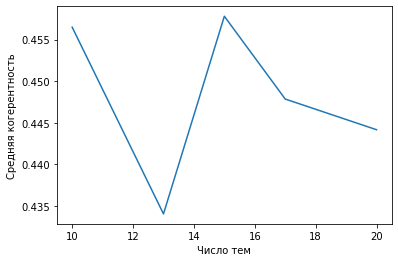

In [46]:
topics_list = [10, 13, 15, 17, 20]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Наибольшие значения метрики получились при 10 и 15 темах. Остановлючь на 15 темах.

In [47]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)